<a href="https://colab.research.google.com/github/ChidhvilasTanay/drug-discovery-CHEMBL/blob/main/4_bioactivity_prediction_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **QSAR Model Building of Acoronavirus Inhibitors**




# Read in data

In [1]:
!pip uninstall scikit-learn -y

!pip install -U scikit-learn

Found existing installation: scikit-learn 1.4.1.post1
Uninstalling scikit-learn-1.4.1.post1:
  Successfully uninstalled scikit-learn-1.4.1.post1
  Using cached scikit_learn-1.4.1.post1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)


In [2]:
import sklearn

sklearn.__version__

'1.4.1.post1'

In [3]:
import pandas as pd

In [4]:
dataset_url = 'https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv'
dataset = pd.read_csv('coronavirus_bioactivity_data_3class_pIC50_pubchem_fp.csv')
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.142668
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.026872
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.869666
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.882397
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.698970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.974694
129,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.995679
130,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.939302
131,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.970616


In [5]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
129,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
130,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
131,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
Y = dataset.iloc[:,-1]
Y

0      5.142668
1      5.026872
2      4.869666
3      4.882397
4      5.698970
         ...   
128    4.974694
129    4.995679
130    4.939302
131    4.970616
132    4.102923
Name: pIC50, Length: 133, dtype: float64

# Remove low variance features

In [7]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP19,PubchemFP20,PubchemFP23,PubchemFP33,PubchemFP34,...,PubchemFP755,PubchemFP758,PubchemFP776,PubchemFP779,PubchemFP792,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821
0,0,0,1,1,0,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
1,0,0,1,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,1,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0,1,1,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,1,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1,1,0,0,0,1,1,0,0,0,...,1,0,1,0,0,1,1,1,1,0
129,1,1,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0
130,0,1,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,1,1,1,0
131,0,1,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0


In [8]:
X.to_csv('descriptor_list_coronavirus2.csv', index = False)

In [9]:
# In the app, use the following to get this same descriptor list
# of 218 variables from the initial set of 881 variables
# Xlist = list(pd.read_csv('descriptor_list.csv').columns)
# X[Xlist]

# Random Forest Regression Model

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.8577719126985803

## Model Prediction

In [12]:
Y_pred = model.predict(X)
Y_pred

array([4.94984838, 5.22639799, 5.18426859, 5.21649001, 5.506594  ,
       5.7457982 , 5.29340038, 5.18426859, 5.03634018, 5.18426859,
       4.9711217 , 4.89721317, 4.41099581, 4.42194884, 4.34169546,
       5.93025993, 5.23147744, 4.4803425 , 4.57514287, 4.4803425 ,
       5.58034752, 4.65632023, 5.37958763, 5.37958763, 3.59551872,
       3.59551872, 3.65501268, 3.65501268, 3.78248872, 3.78248872,
       4.01498279, 4.01498279, 4.21679652, 4.21679652, 4.26067245,
       4.26067245, 4.36937683, 4.36937683, 4.81993952, 4.81993952,
       4.81923938, 4.81923938, 4.15267654, 4.09187712, 4.15267654,
       3.28908918, 4.09187712, 3.28908918, 3.48598886, 3.48598886,
       3.48382889, 3.48382889, 3.55973017, 3.55973017, 3.63286958,
       3.63286958, 3.73772906, 3.73772906, 3.6793731 , 3.6793731 ,
       3.84338029, 3.84338029, 3.74615702, 3.74615702, 4.2128869 ,
       4.2128869 , 4.337114  , 4.337114  , 4.39903584, 4.39903584,
       4.81993952, 4.81993952, 4.87404377, 4.87404377, 4.84578

## Model Performance

In [13]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.12
Coefficient of determination (R^2): 0.86


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [14]:
%pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

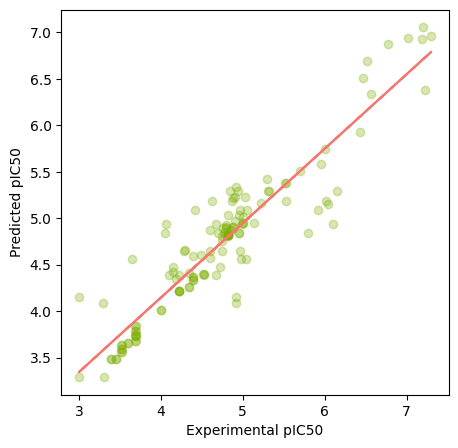

In [15]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Save Model as Pickle Object

In [16]:
import pickle

In [17]:
with open('corona_virus_model2.pkl', 'wb') as f:
    pickle.dump(model, f, protocol=4)